In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv("unet_evalutation.csv")
df["model_scale"] = df["model"].apply(lambda x: 0.5 if x == "unet_quip_ds" else 1.0)

<AxesSubplot:ylabel='iou'>

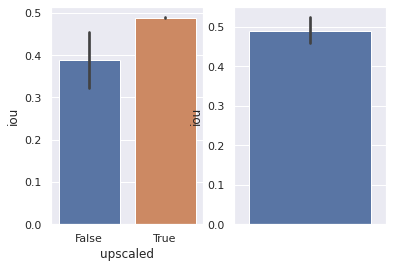

In [18]:
plt.subplot(121)
df_like_tnbc = df[(df["scale"] == 0.5) & (df["model_scale"] == 1.0) & (df["cutoff"] == 0.1)]
sns.barplot(
    data=df_like_tnbc, x="upscaled", y="iou",
)

plt.subplot(122)
df_like_tnbc = df[(df["scale"] == 0.5) & (df["model_scale"] == 0.5) & (df["upscaled"] == False)]
sns.barplot(
    data=df_like_tnbc, y="iou",
)

<AxesSubplot:xlabel='cutoff', ylabel='iou'>

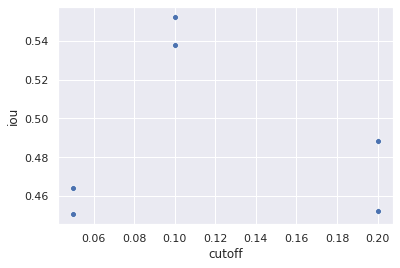

In [5]:
sns.scatterplot(
    data = df_like_tnbc, x="cutoff", y="iou"
)